# Kalman filtering benchmark 

In [1]:
%load_ext autoreload
%autoreload 2

### Import packages

In [3]:
import logging
import matplotlib.pyplot as plt

from logger import logger
from fileops import loadtif, savetif
from viewers import view, dualview
from plotters import plot_stack_summary
from filters import KalmanDenoiser

logger.setLevel(logging.INFO)

### Load raw image stack

In [4]:
fpath = '../../data/misc/insulinoma_raw.tif'

 14/10/2021 19:38:31: loaded (100, 256, 170) uint8 stack from "../../data/misc/insulinoma_raw.tif"
 14/10/2021 19:38:32: stack size: (90, 256, 170)
 14/10/2021 19:38:32: rendering stack view...


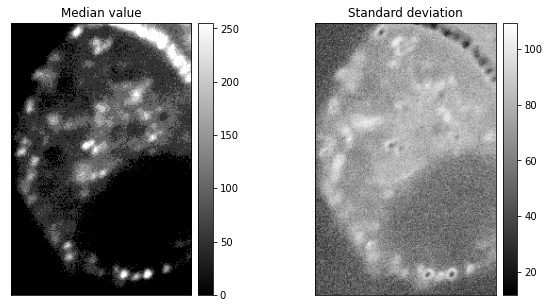

In [5]:
stack = loadtif(fpath)
stack = stack / stack.max() * 255
stack = stack[10:]
fig = plot_stack_summary(stack)
view(stack, title='Raw')

### Generate and visualize padding baseline

 14/10/2021 19:38:48: constructing 10-frames baseline from 90-frames stack...
 14/10/2021 19:38:48: stack size: (10, 256, 170)
 14/10/2021 19:38:48: rendering stack view...


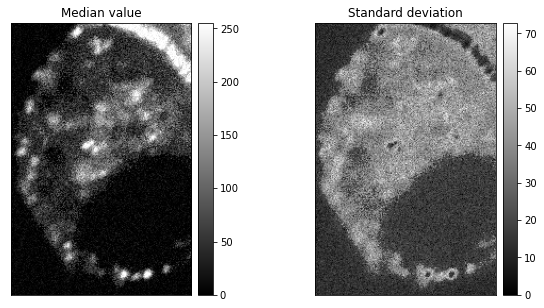

In [7]:
npad = 10
baseline = KalmanDenoiser.get_baseline(stack, npad)
fig = plot_stack_summary(baseline)
view(baseline)

### Apply Kalman filtering and compare outputs

 14/10/2021 19:38:54: constructing 10-frames baseline from 90-frames stack...
 14/10/2021 19:38:54: filtering 90-frames stack with KalmanDenoiser(gain=0.8, var=0.05, npad=10)


100%|██████████| 99/99 [00:00<00:00, 2608.30it/s]


 14/10/2021 19:38:55: stack size: (90, 256, 170)
 14/10/2021 19:38:55: rendering stacks view...


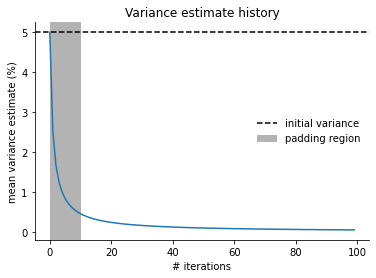

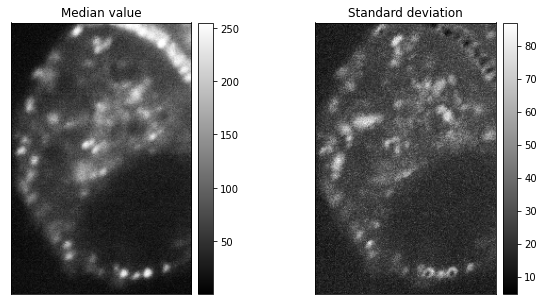

In [8]:
gain = 0.8
variance = 0.05
npad = 10
kd = KalmanDenoiser(G=gain, V=variance, npad=npad)
filtered_stack, ex_history = kd.filter(stack, full_output=True)
fig1 = kd.plot_variance_history(ex_history);
fig2 = plot_stack_summary(filtered_stack);
dualview(stack, filtered_stack, title1='Raw', title2='Filtered', suptitle=kd)